In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [17]:
saved_style_state = matplotlib.rcParams.copy()

In [18]:
filepath = "dfosf001.csv"
if os.path.isfile(filepath):
    print("loading from file")
else:
    filepath = "https://www.revenue.nsw.gov.au/__data/assets/file/0005/429332/dfosf001.zip"
    print("loading from the internet")

penalty_data = pd.read_csv(filepath)
print("done")

loading from file
done


# CRIME STATS

# The Data 

First lets take a look at our data. Lets take a sample of 4 rows

In [60]:
penalty_data.sample(4)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
233412,2013-2014,2013-12-01,24704,Exceed speed limit over 10 km/h - Camera Detec...,ROAD RULES 2008,20,1595,Y,Fixed Digital Speed Camera,9824.0,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,4,6380
217551,2013-2014,2013-11-01,24702,Exceed speed limit 10 km/h and under - Camera ...,ROAD RULES 2008,20,885,Y,Fixed Digital Speed Camera,9660.0,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,3,2655
263452,2015-2016,2016-01-01,83716,Not park wholly within parking bay,ROAD RULES 2014,211(2),106,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,507,53742
98180,2018-2019,2018-10-01,82589,Use wheeled toy on road with dividing line/med...,ROAD RULES 2014,240(1),75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,1,75


Here we can see the 4 random data samples taken out of the csv file layed out in a readable format. This will help provide an undersatnding into what we are really diving into.

Now lets anaylyse the data set 

# Legislation 

In [20]:
penalty_data["LEGISLATION"].value_counts()

ROAD RULES 2014                                                       179805
ROAD RULES 2008                                                        63717
HEAVY VEHICLE NATIONAL LAW (NSW)                                        4746
PASSENGER TRANSPORT REGULATION 2007                                     3966
ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION 2007                   3490
PROTECTION OF THE ENVIRONMENT OPERATIONS ACT 1997                       3185
ROAD TRANSPORT ACT 2013                                                 2903
LOCAL GOVERNMENT ACT 1993                                               2540
COMPANION ANIMALS ACT 1998                                              2290
ENVIRONMENTAL PLANNING AND ASSESSMENT ACT 1979                          2018
NATIONAL PARKS AND WILDLIFE REGULATION 2009                             1892
LIQUOR ACT 2007                                                         1612
FISHERIES MANAGEMENT ACT 1994                                           1578

There is huge number of offences under the road rules 2014 legislation, so we automatically know that most offences in this data set come under that legislation category but first, lets look at some others.

Text(0.5, 0, 'Legislation')

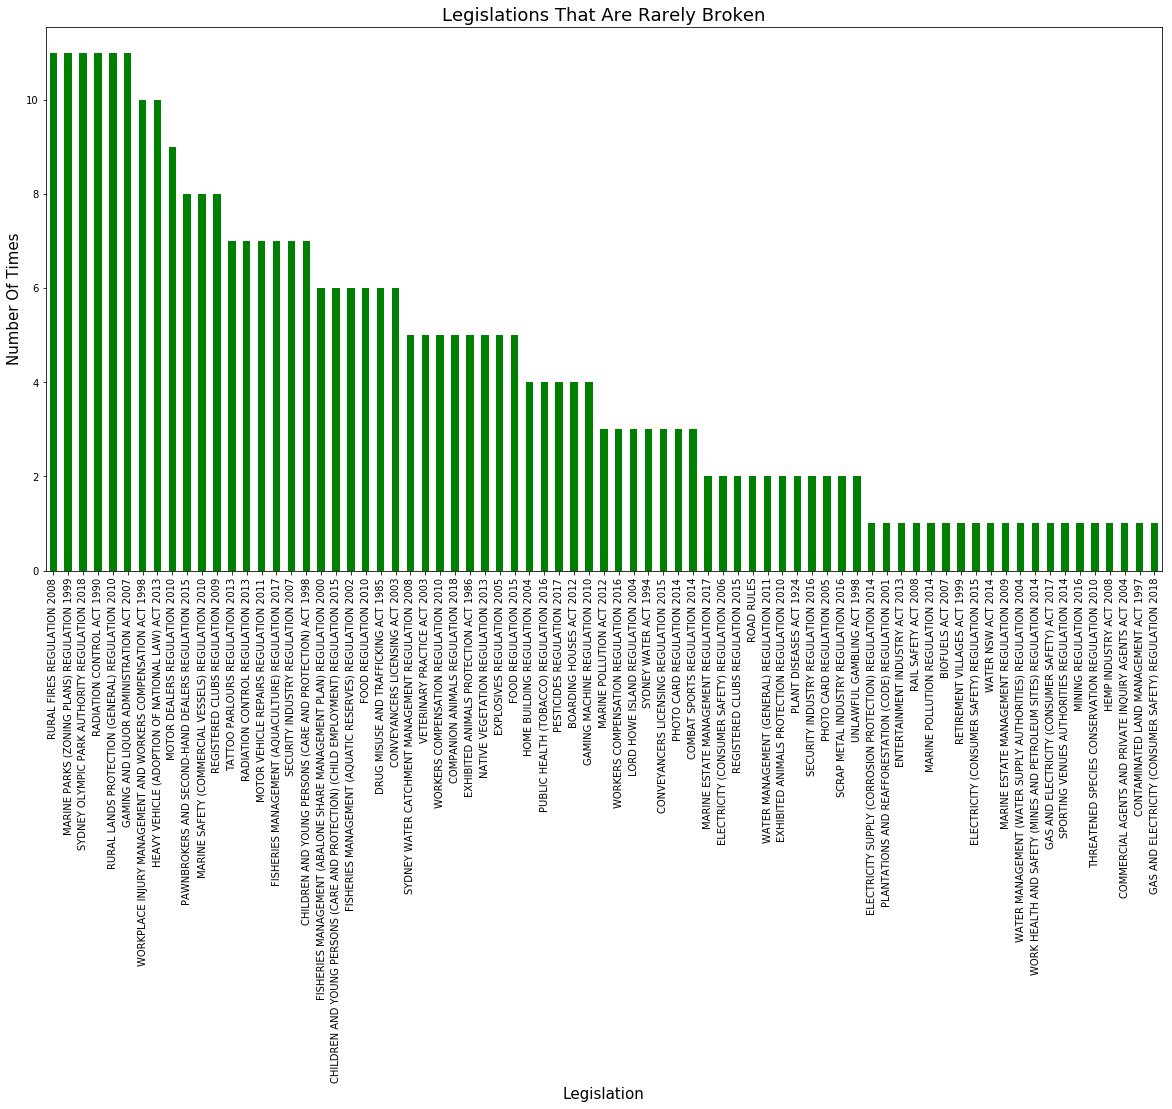

In [21]:
Legislation_Graph = penalty_data["LEGISLATION"].value_counts()
Legislation_Graph[Legislation_Graph < 12].plot(kind = "bar", color ="g")
plt.title("Legislations That Are Rarely Broken", fontsize = 18)
plt.ylabel("Number Of Times", fontsize = 15)
plt.xlabel("Legislation", fontsize = 15)

Text(0.5, 0, 'Legislation')

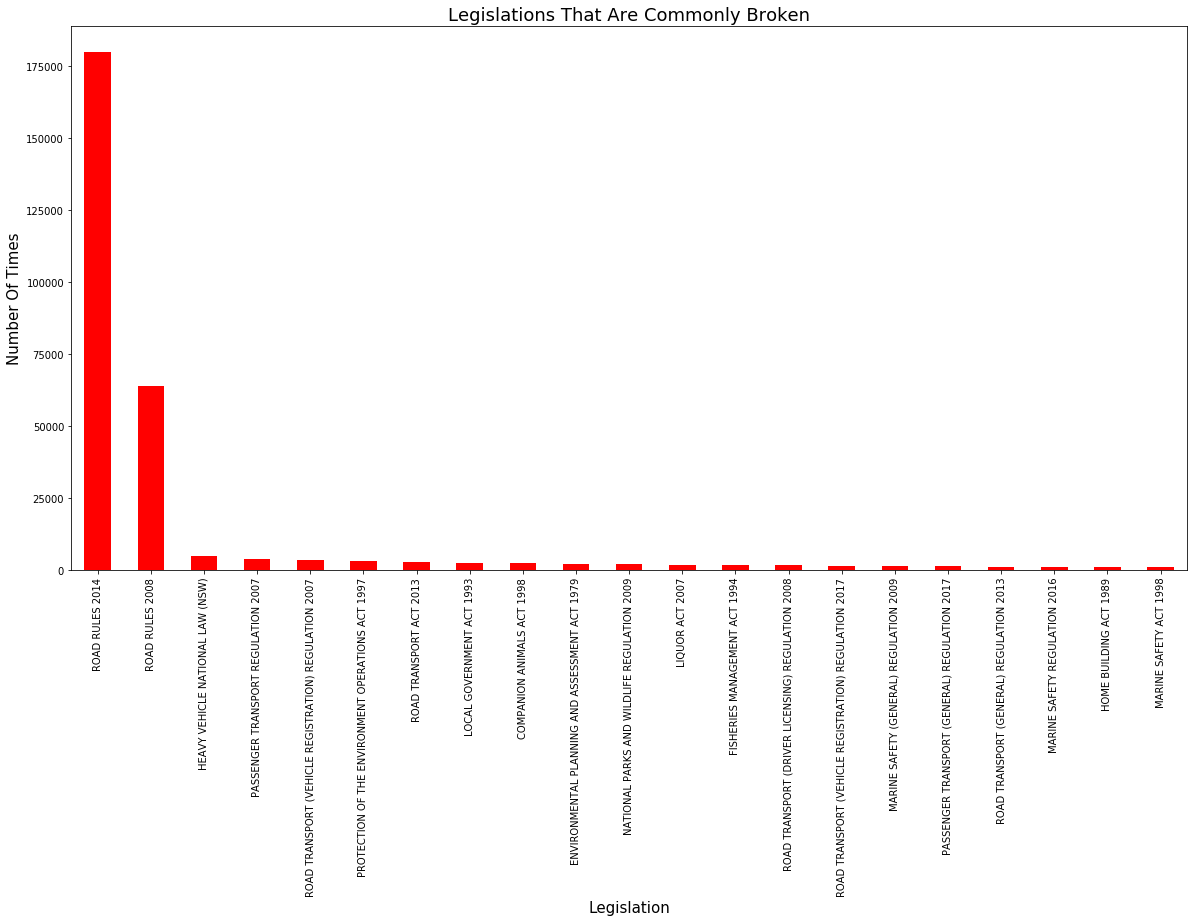

In [22]:
Legislation_Graph_Com = penalty_data["LEGISLATION"].value_counts()
Legislation_Graph_Com[Legislation_Graph_Com > 1000].plot(kind = "bar", color ="r")
plt.title("Legislations That Are Commonly Broken", fontsize = 18)
plt.ylabel("Number Of Times", fontsize = 15)
plt.xlabel("Legislation", fontsize = 15)

<Figure size 1440x1440 with 0 Axes>

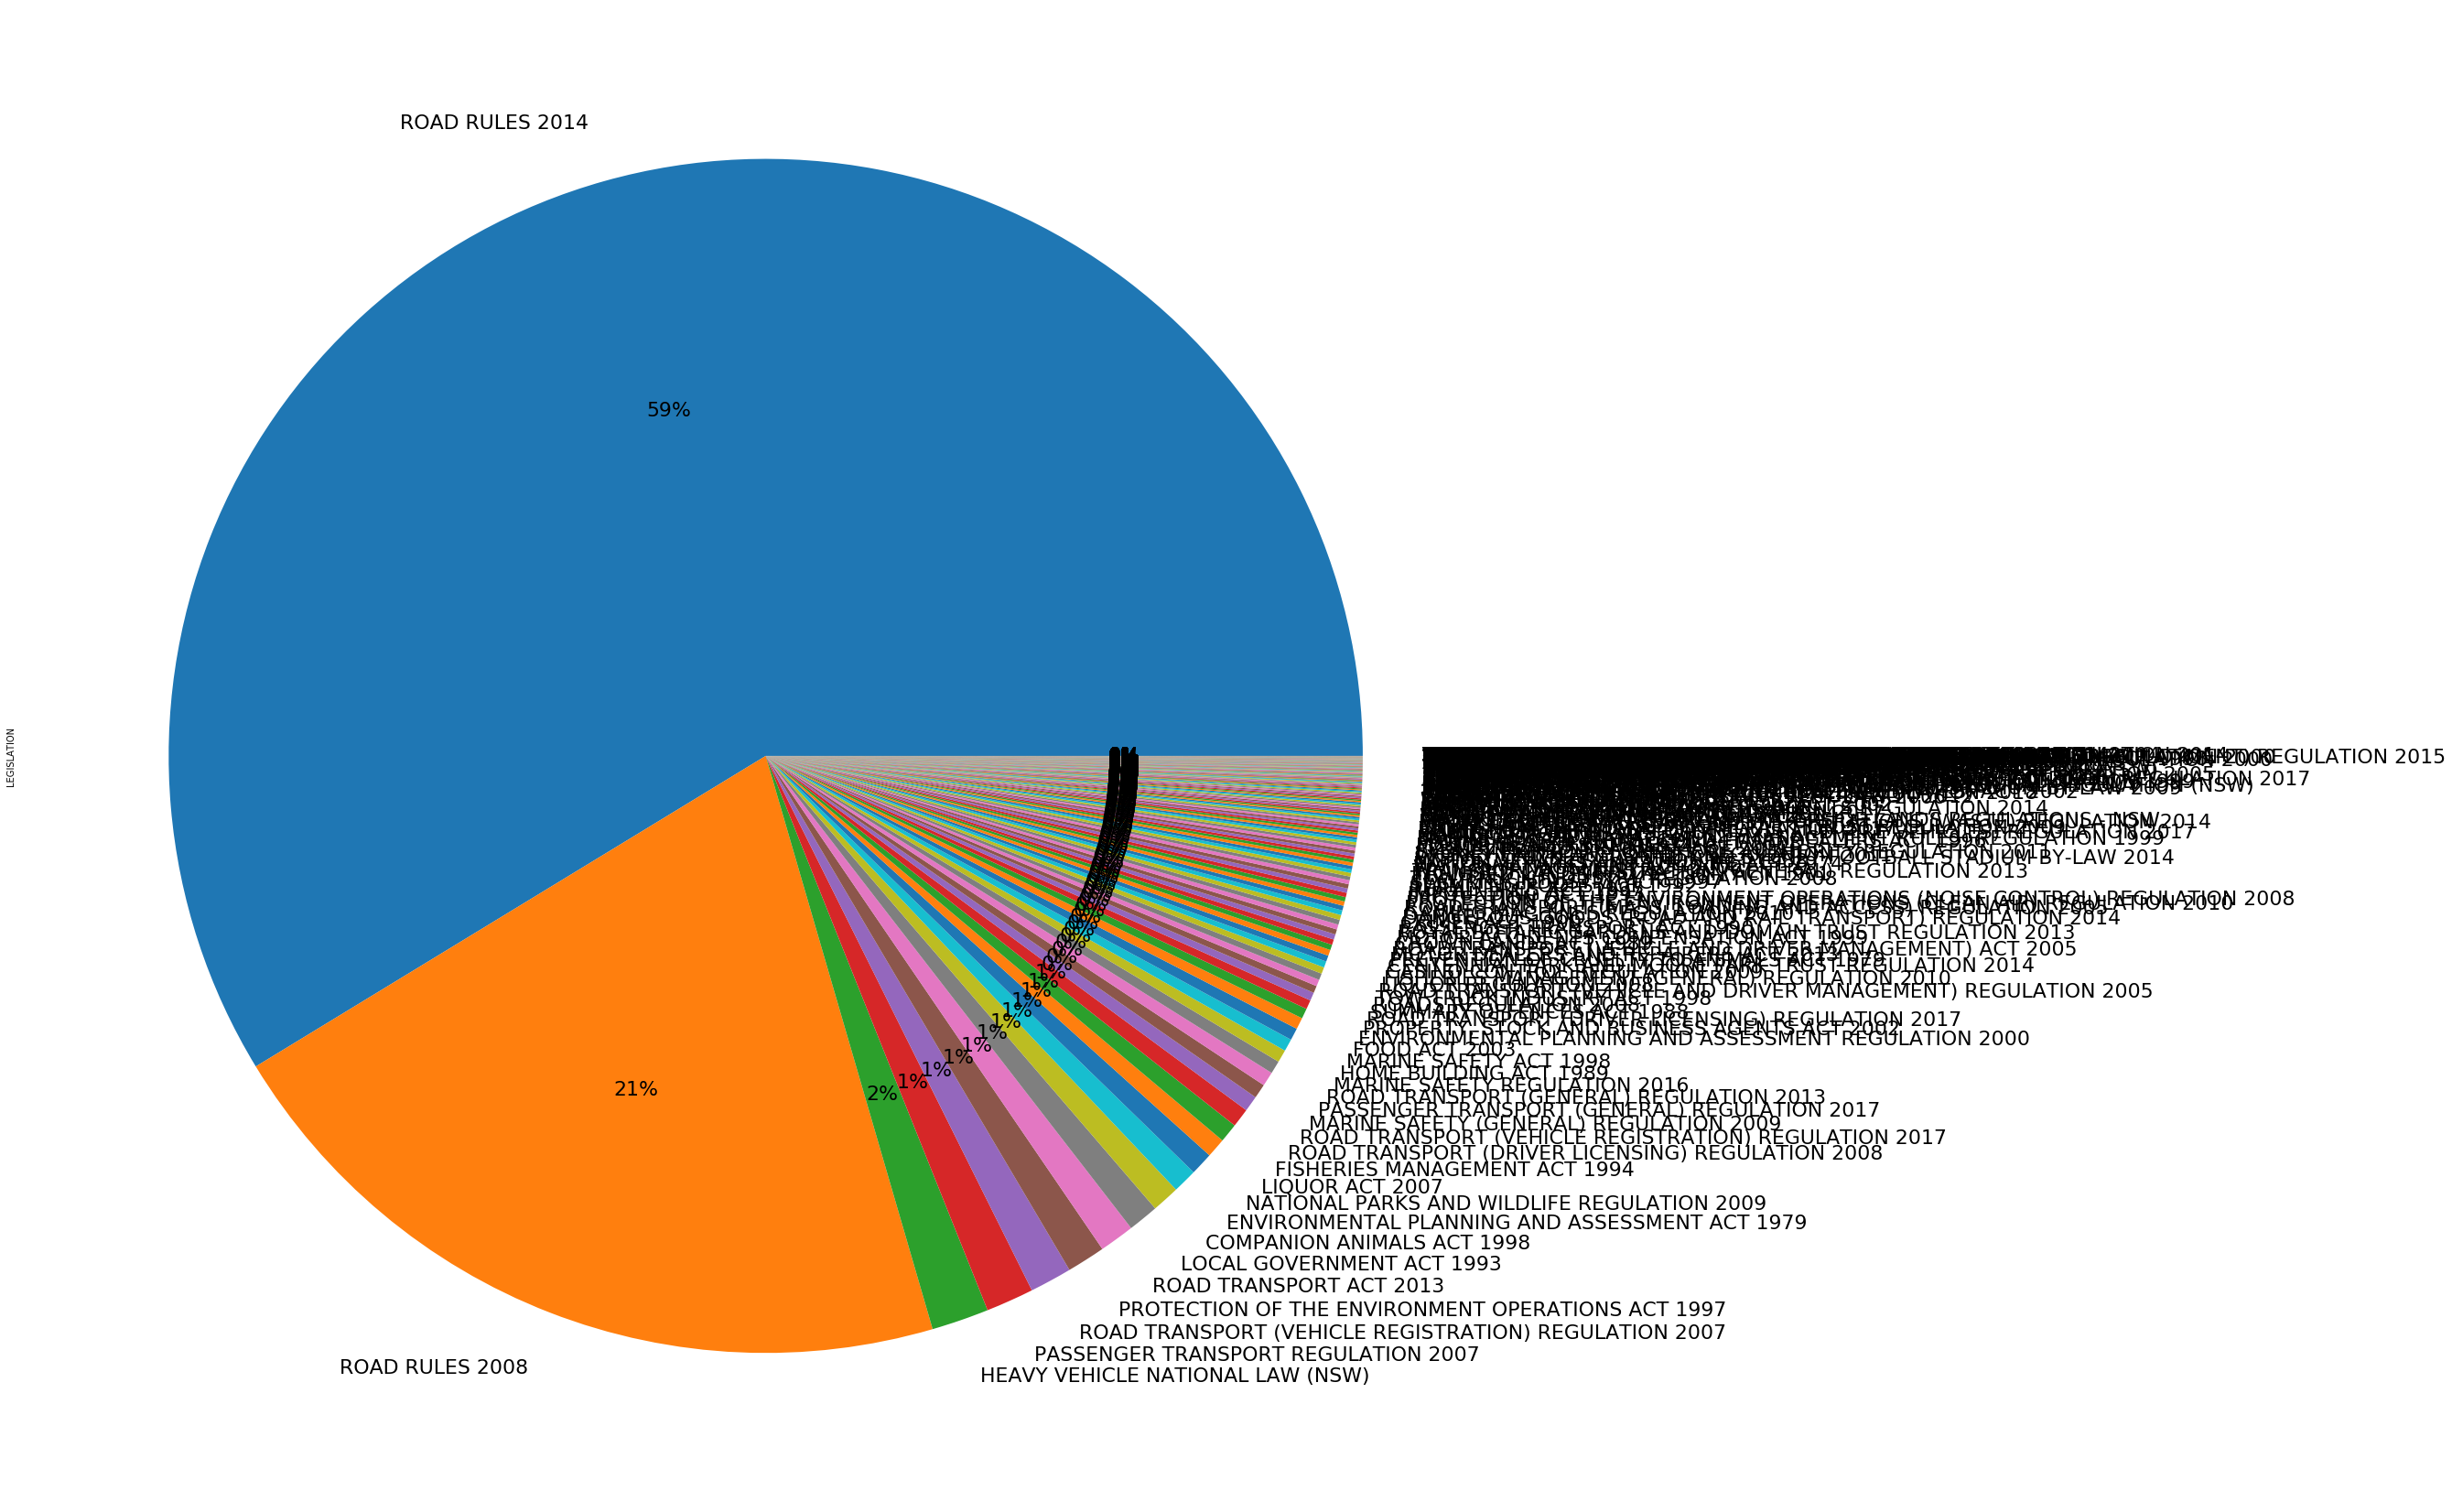

<Figure size 1440x1440 with 0 Axes>

In [76]:
plt.figure(figsize=(30,30))
penalty_data["LEGISLATION"].value_counts().plot(kind = 'pie', autopct = "%1.0f%%", fontsize = 22)
plt.figure(figsize=(20,20))

Text(0.5, 1.0, 'Legislations')

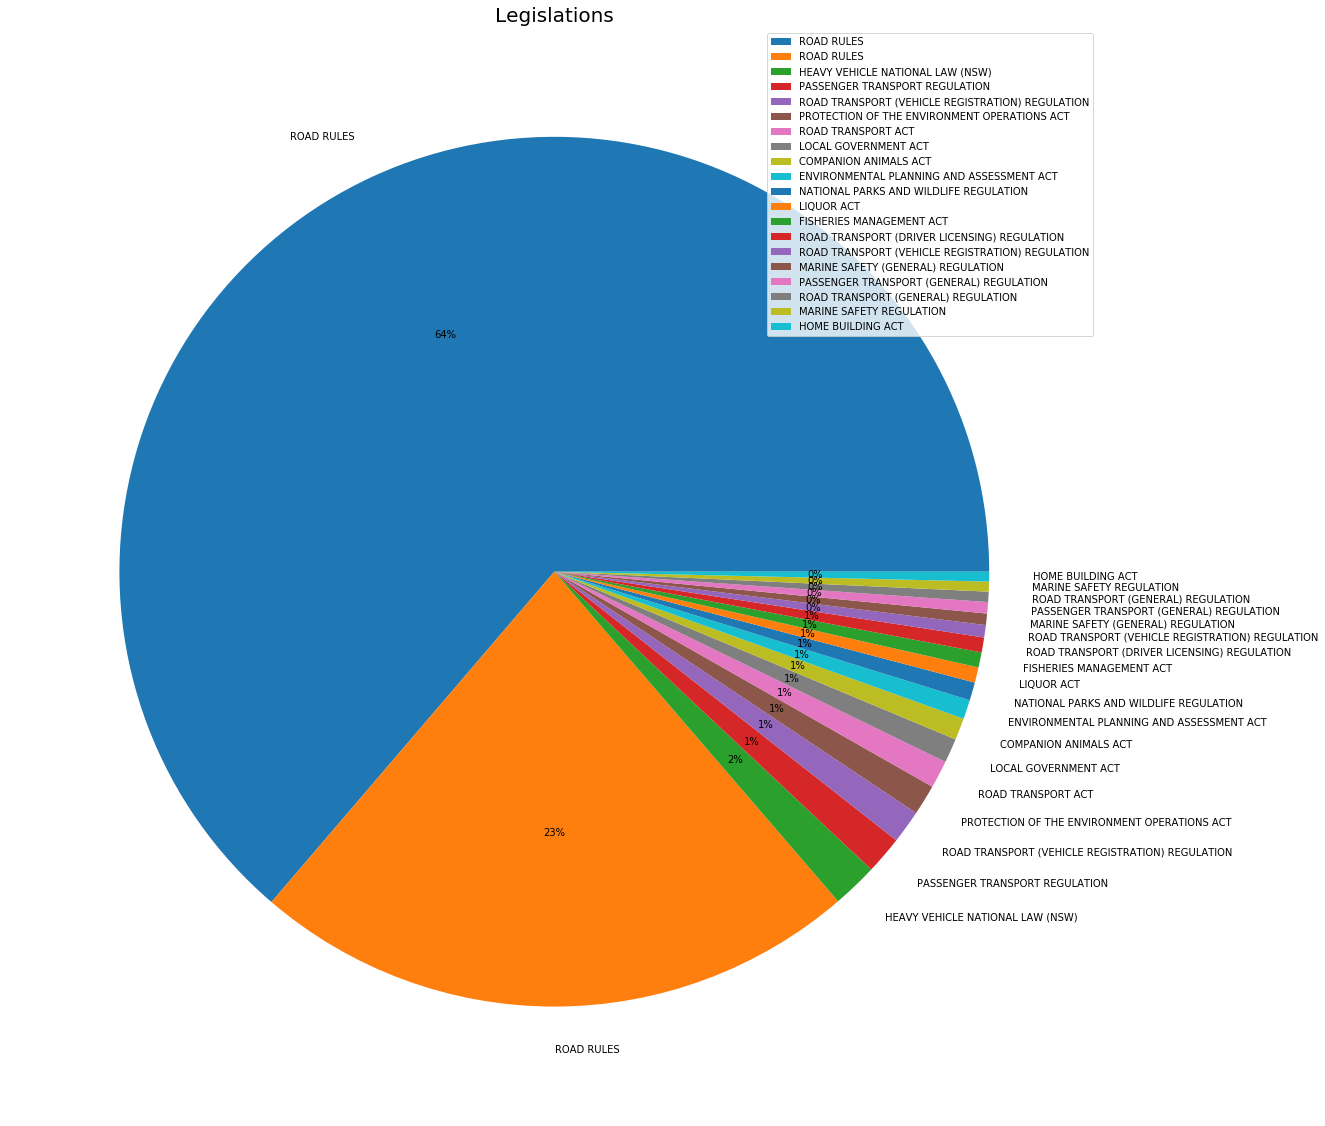

In [68]:
k = []
for i in range(0,20):
    penalty_data["LEGISLATION"].value_counts()[i]
    p = penalty_data["LEGISLATION"].value_counts()[i]
    k.append(p)
else:
    pass
k

label = ["ROAD RULES","ROAD RULES","HEAVY VEHICLE NATIONAL LAW (NSW)","PASSENGER TRANSPORT REGULATION","ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION","PROTECTION OF THE ENVIRONMENT OPERATIONS ACT","ROAD TRANSPORT ACT","LOCAL GOVERNMENT ACT","COMPANION ANIMALS ACT","ENVIRONMENTAL PLANNING AND ASSESSMENT ACT","NATIONAL PARKS AND WILDLIFE REGULATION","LIQUOR ACT","FISHERIES MANAGEMENT ACT","ROAD TRANSPORT (DRIVER LICENSING) REGULATION","ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION","MARINE SAFETY (GENERAL) REGULATION","PASSENGER TRANSPORT (GENERAL) REGULATION","ROAD TRANSPORT (GENERAL) REGULATION","MARINE SAFETY REGULATION","HOME BUILDING ACT"]
values = k
plt.figure(figsize=(20,20))
plt.pie(values,labels = label, autopct = "%1.0f%%");
plt.legend(label, loc="best")
plt.title("Legislations", fontsize = 20)

Notice that more than 3/4 of the fines are under road rules, now lets delve further and look at what road rules are broken the most

In [25]:
Red_Light = []
for m in range(0,len(penalty_data)):
    rows = penalty_data.iloc[m]
    if rows["RED_LIGHT_CAMERA_IND"] == "Y":
        Red_Light.append(rows["RED_LIGHT_CAMERA_IND"])
    else:
        pass
print(len(Red_Light))

30580


In [26]:
Speed_Cam = []
for m in range(0,len(penalty_data)):
    rows = penalty_data.iloc[m]
    if rows["SPEED_CAMERA_IND"] == "Y":
        Speed_Cam.append(rows["SPEED_CAMERA_IND"])
    else:
        pass
print(len(Speed_Cam))

163518


In [27]:
Seatbelt = []
for m in range(0,len(penalty_data)):
    rows = penalty_data.iloc[m]
    if rows["SEATBELT_IND"] == "Y":
        Seatbelt.append(rows["SEATBELT_IND"])
    else:
        pass
print(len(Seatbelt))

1656


In [28]:
Phone = []
for m in range(0,len(penalty_data)):
    rows = penalty_data.iloc[m]
    if rows["MOBILE_PHONE_IND"] == "Y":
        Phone.append(rows["MOBILE_PHONE_IND"])
    else:
        pass
print(len(Phone))

303


In [29]:
Parking = []
for m in range(0,len(penalty_data)):
    rows = penalty_data.iloc[m]
    if rows["PARKING_IND"] == "Y":
        Parking.append(rows["PARKING_IND"])
    else:
        pass
print(len(Parking))

10977


# Face Value 

The Face Value is the ammount of money a person has to pay for their fine. Now lets take a look at the numbers and try to find out what the average ammount and the most common ammount a person pays is. 

In [30]:
Face_Val = penalty_data["FACE_VALUE"]
Face_Val

0          263
1          200
2          337
3          550
4          880
5         2240
6          257
7          330
8          439
9          110
10         330
11         330
12         884
13         269
14         330
15         110
16         549
17         112
18         439
19         448
20         903
21         265
22         325
23         325
24         108
25         650
26         269
27         116
28         439
29         257
          ... 
306246     116
306247     269
306248     265
306249    1345
306250    2025
306251     116
306252     550
306253     106
306254     446
306255     417
306256     436
306257     260
306258     448
306259     275
306260     275
306261     265
306262     595
306263     397
306264     116
306265     112
306266     109
306267    2275
306268     815
306269     659
306270     112
306271     260
306272     835
306273     265
306274     448
306275     415
Name: FACE_VALUE, Length: 306276, dtype: int64

Here we have each face_value from the first fine recorded, all the way to the last. Now we want these numbers to look presentable in a graph and as you can see this is labeled in an x-y system
- x being the fine number 
- y being the cost
Now lets make a histogram

Lets plot it

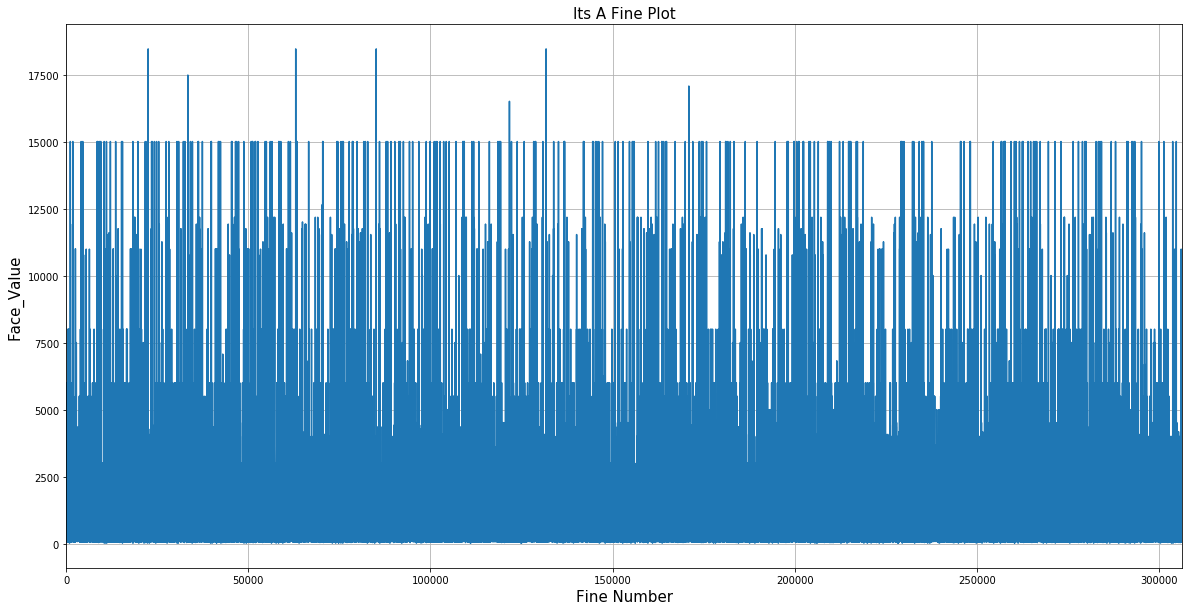

In [31]:
Face_Val.plot()
plt.xlabel("Fine Number", fontsize = 15)
plt.ylabel("Face_Value", fontsize = 15)
plt.title("Its A Fine Plot", fontsize = 15)
plt.grid(True)

In the polt above we can't make too may concrete statements, except for the fact that there are massive outliers.

To make sure of this lets look at the mean and variance of the face_values

In [32]:
cost = Face_Val
print(np.mean(cost))
print(np.var(cost))

565.6074553670545
781506.5882749136


A high variance indicates that the data points are very spread out from the mean, meaning that there are in fact outliers

Sooooo, lets concentrate on values that are closer to the mean and see what type of graphs we can create

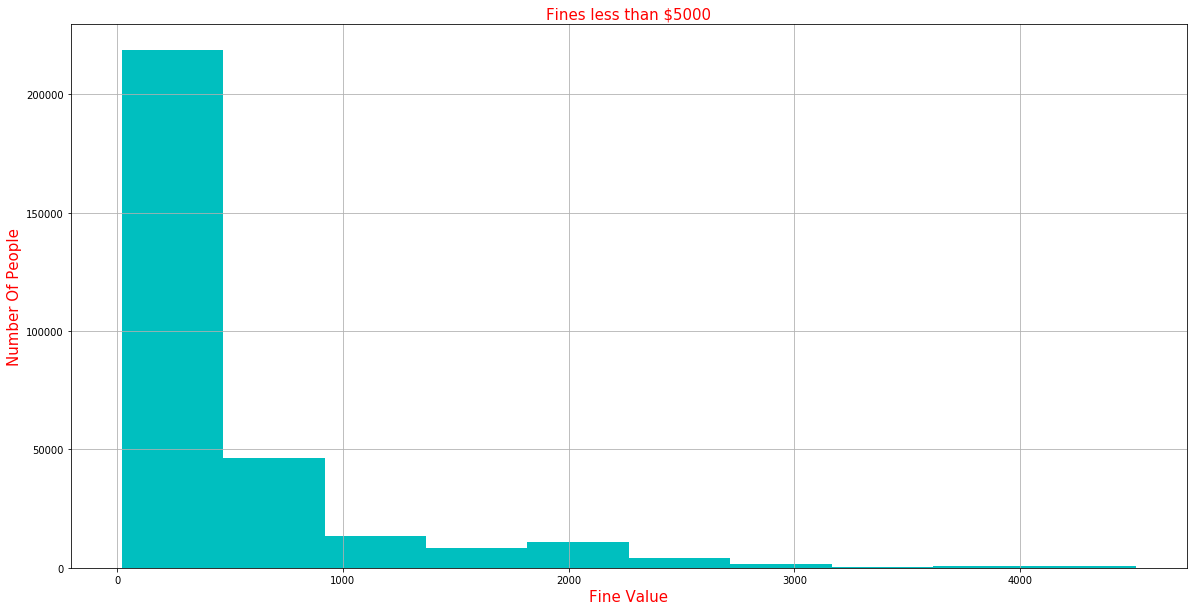

In [56]:
Face_Val[Face_Val < 5000].hist(color = 'c')
plt.xlabel("Fine Value", fontsize = 15, color = "r")
plt.ylabel("Number Of People", fontsize = 15, color = "r")
plt.title("Fines less than $5000", fontsize = 15, color = "r")
plt.grid(True)

This graph again doesnt really help so lets get even closer to the mean.

But first lets do a quick test and see how many fines are under a certain cost (this will make it easier to construct a interesting graph)

In [35]:
Fine_under_500 = [i for i in Face_Val if i <= 500]
print(len(Fine_under_500)) #this will tell us how many FACE_VALUES will have a number less than and equal to 500
Fine_under_1000 = [i for i in Face_Val if i <= 1000] #this will tell us how many FACE_VALUES will have a number less than and equal to 500
Fine_between_500_and_1000 = len(Fine_under_1000) - len(Fine_under_500)
print(Fine_between_500_and_1000) #this will tell us how many FACE_VALUES will have a number,  500 < number <= 1000

226870
40887


From this data we can see that over 74% of FACE_VALUES are under or equal to 500 dollars and less than 26% are over 500 dollars, which means majority of fines that are give out in Australia are for offences that total under 500

Soooo, lets concentrate on FACE_VALUES under 500 dollars

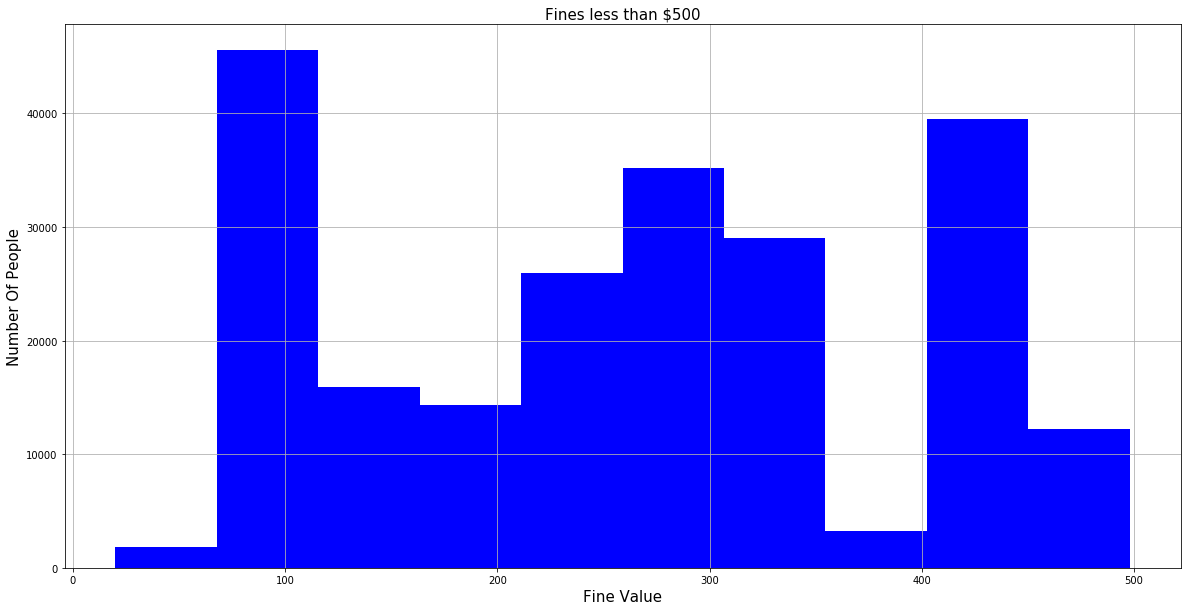

In [36]:
Face_Val[Face_Val < 500].hist(color = "b")
plt.xlabel("Fine Value", fontsize = 15)
plt.ylabel("Number Of People", fontsize = 15)
plt.title("Fines less than $500", fontsize = 15)
plt.grid(True)

Now this is interesting, we can see that there is a noticable spike at arround 100, 400-450 and arround 300

Lets delve further in 

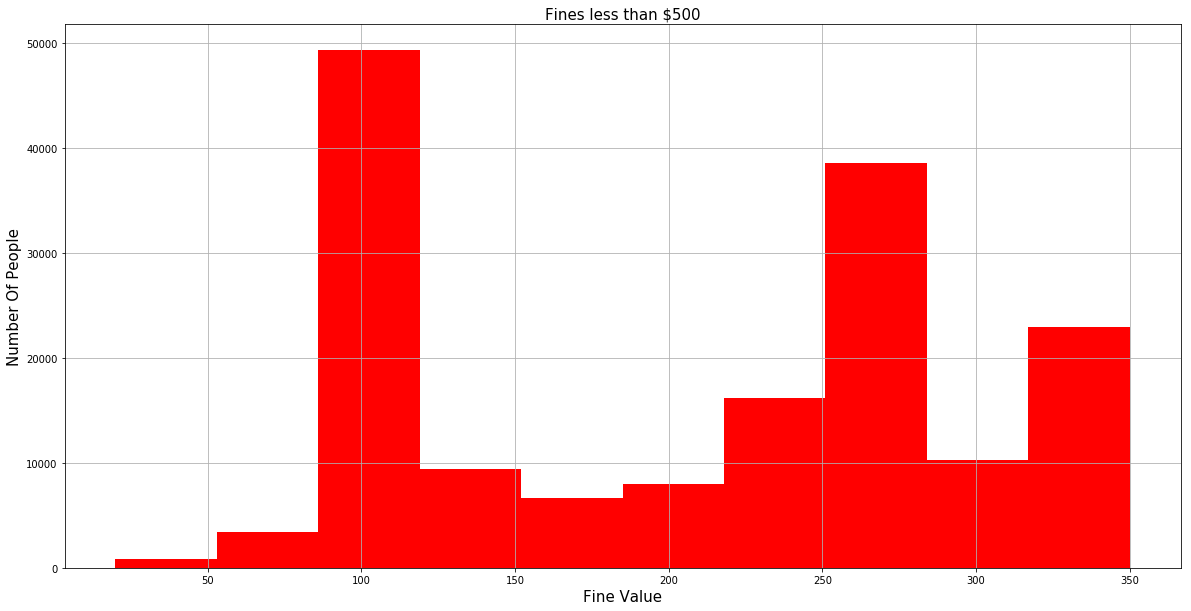

In [37]:
Face_Val[Face_Val <= 350].hist(color = "r")
plt.xlabel("Fine Value", fontsize = 15)
plt.ylabel("Number Of People", fontsize = 15)
plt.title("Fines less than $500", fontsize = 15)
plt.grid(True)

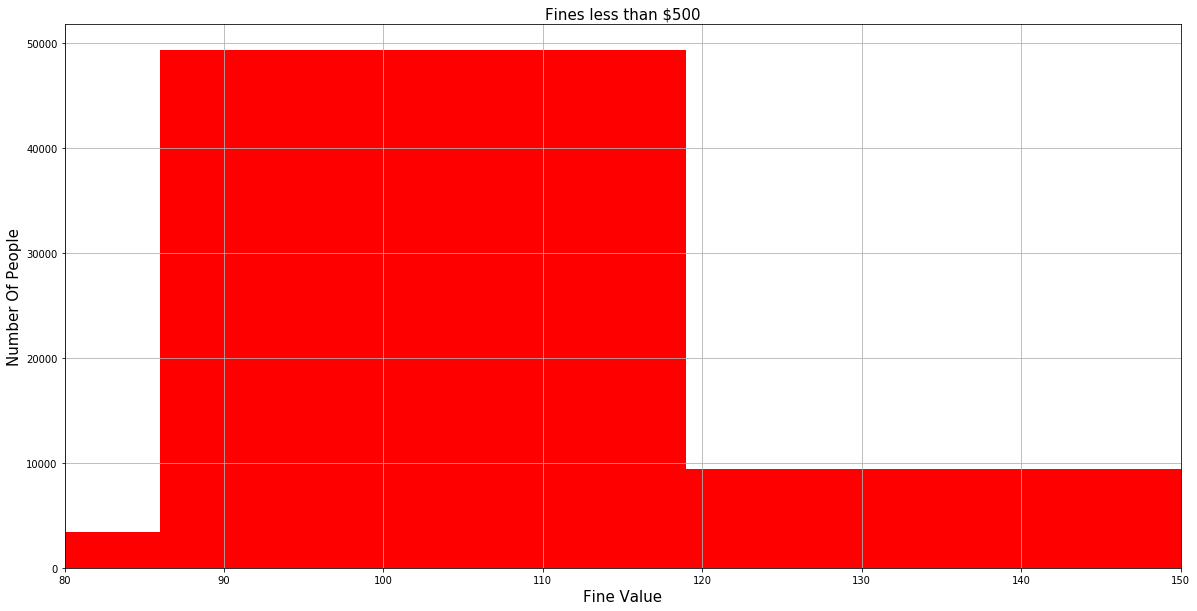

In [38]:
Face_Val[Face_Val <= 350].hist(color = "r")
plt.xlim(80, 150)
plt.xlabel("Fine Value", fontsize = 15)
plt.ylabel("Number Of People", fontsize = 15)
plt.title("Fines less than $500", fontsize = 15)
plt.grid(True)

From this graph we can see that most fines are given out arround $100 

Now lets take a look at why

# Offence Code

We've looket at the most common fines given out to people living in Australia
Now lets look at which offence codes are the most common

In [39]:
Offences = penalty_data["OFFENCE_CODE"]
Offences

0         82605
1         18056
2         83324
3         15266
4         11339
5         33406
6         83632
7         83372
8         83491
9         83509
10        90195
11        82656
12        83174
13        82950
14        83325
15        83706
16        83517
17        90198
18        80120
19        82914
20        83140
21        82950
22        82631
23        83359
24        63003
25        79788
26        82950
27        83063
28        83378
29        90135
          ...  
306246    83063
306247    82950
306248    82950
306249    32950
306250    24731
306251    83063
306252    15324
306253    74701
306254    83051
306255    74705
306256    82995
306257    82950
306258    83406
306259    82950
306260    82950
306261    82950
306262    33063
306263    74733
306264    83063
306265    83063
306266    83063
306267    33051
306268    74707
306269    79001
306270    83063
306271    82950
306272    74707
306273    82950
306274    83406
306275    74731
Name: OFFENCE_CODE, Leng

Here we have all the offence codes, now lets see how many times each code has been used 

In [40]:
penalty_data["OFFENCE_CODE"].value_counts()

83063    31493
82950    30896
82995    12775
74703    10677
74701    10545
83406     9781
83491     7008
33063     6693
82960     5134
32950     4790
74705     4668
82957     4499
83052     4354
33406     3629
74731     3014
24701     2640
83229     2321
33491     2236
83039     2191
32957     2101
83466     2090
74733     1950
24703     1935
83093     1922
74702     1745
74707     1706
74704     1685
83162     1643
33052     1375
83180     1251
         ...  
81019        1
91385        1
87039        1
84988        1
78102        1
79856        1
87556        1
34110        1
16336        1
74249        1
83318        1
13656        1
64440        1
74874        1
91250        1
79115        1
90108        1
12242        1
79345        1
90500        1
87181        1
71439        1
66551        1
84343        1
33086        1
64200        1
18095        1
16288        1
16607        1
85098        1
Name: OFFENCE_CODE, Length: 6823, dtype: int64

From the data we can observe that code 83063 appears the most, approximately 1 in 10 crimes are labelled with the 83063 offence_code
Code 83063 is:
Motor vehicle exceed speed limit - 10 km/h and under - Camera recorded - Individual

Note code 82950 also comes under Road Rule legislations == Motor vehicle exceed speed limit - over 10 km/h - Camera recorded - Individual

Note code 82995 also comes under Road Rule legislations == Motor vehicle exceed speed limit - over 20 km/h - Camera recorded - Individual

same for 74703, 74701, 83406 etc

Lets Confrim this 

In [41]:
list_Face_Value = []
for j in range(0,len(penalty_data)):
    row_one = penalty_data.iloc[j]
    if row_one["OFFENCE_CODE"] == 83063:
        list_Face_Value.append(row_one["FACE_VALUE"])
        print(row_one["FACE_VALUE"])
    else:
        pass

116
116
112
119
119
114
116
114
114
112
114
119
112
114
116
119
119
112
112
114
109
119
119
116
109
114
109
119
119
114
114
112
114
109
109
114
109
116
114
119
116
114
112
119
119
114
112
109
116
112
109
109
119
116
109
112
112
114
114
112
109
119
109
109
112
119
112
119
119
114
119
119
119
114
116
114
116
109
112
114
114
114
114
119
112
119
114
114
112
119
114
112
119
119
119
116
116
109
119
116
112
116
119
114
114
109
112
119
112
116
119
112
112
114
119
112
112
112
119
119
116
114
114
112
109
112
116
114
112
116
114
112
119
116
119
116
119
114
114
112
116
116
112
119
116
109
119
114
109
112
119
109
116
114
119
119
119
116
116
116
109
112
119
112
119
114
114
116
112
114
112
119
119
112
119
114
112
109
116
112
116
112
119
114
116
109
116
114
114
116
109
109
119
116
119
119
119
109
114
119
116
112
112
114
116
112
116
109
119
114
119
119
116
119
112
119
114
114
119
116
109
112
109
116
119
109
119
114
112
112
114
114
116
109
114
116
109
119
116
114
116
116
116
119
116
119
119
109
114
119


112
109
116
116
116
114
114
112
109
114
116
112
109
112
109
116
119
112
112
114
114
114
119
109
109
119
109
116
116
114
109
119
119
116
119
109
112
109
114
116
114
119
112
116
112
119
114
119
112
112
116
112
119
119
114
119
114
112
119
116
119
114
112
119
112
116
116
109
114
119
119
116
116
112
119
109
109
114
119
114
109
119
109
114
112
112
109
119
119
119
109
109
109
112
119
112
109
116
114
119
116
116
112
114
112
112
119
114
112
112
116
112
114
112
112
114
112
114
114
119
119
114
109
114
112
112
112
116
119
116
109
116
116
112
116
116
109
112
119
119
116
116
112
114
119
112
119
114
109
116
112
119
119
116
109
112
119
114
119
114
109
114
116
119
119
119
109
114
112
116
114
112
119
109
116
116
116
116
114
109
112
116
112
112
112
112
114
116
114
112
112
114
112
114
116
119
112
116
119
109
119
114
116
109
112
119
114
114
119
119
119
119
112
112
116
116
119
119
119
112
119
109
112
119
119
119
112
119
119
119
112
114
116
109
112
119
119
114
119
116
109
109
112
116
119
116
119
109
116
109


119
119
119
112
119
112
114
116
112
114
116
119
114
116
116
116
119
114
119
114
112
109
114
116
109
114
109
112
112
114
114
112
114
116
114
116
109
112
116
114
119
112
116
116
119
109
119
119
112
109
116
119
119
116
116
116
109
119
112
114
112
112
114
114
112
116
112
119
114
112
116
119
116
119
114
114
114
112
119
116
116
119
119
116
116
112
119
109
116
112
112
109
112
112
114
116
112
116
119
116
114
116
116
116
116
116
112
119
119
119
112
109
119
114
114
119
114
114
114
109
114
116
119
112
119
112
114
116
114
119
112
114
116
114
112
119
116
119
112
116
119
109
112
116
116
112
119
119
112
114
114
114
112
116
119
112
119
114
109
114
114
116
119
114
116
109
116
116
119
112
112
109
116
112
112
114
119
119
114
109
114
112
119
114
112
119
114
119
116
116
112
112
114
112
112
112
119
114
116
119
116
119
116
112
119
119
119
116
119
119
112
114
112
112
114
112
119
116
116
116
116
114
114
112
119
112
119
116
119
112
112
109
119
116
109
109
109
114
112
119
119
119
116
114
119
109
116
112
119
114


109
112
112
116
114
109
119
112
112
119
114
116
109
109
119
116
112
109
116
116
116
112
114
109
109
112
119
119
114
109
109
109
109
119
116
112
112
109
119
109
119
114
109
112
116
112
119
116
116
119
112
119
116
119
114
116
109
109
112
119
109
109
112
119
112
114
109
119
119
114
109
116
109
112
114
114
112
116
116
114
114
112
116
114
112
109
116
114
114
112
109
119
112
119
116
114
116
119
114
119
119
114
112
112
112
112
116
119
119
114
112
109
109
119
114
119
114
112
112
112
119
114
112
112
109
112
114
109
109
112
119
109
112
116
114
119
119
119
119
109
112
119
114
116
119
119
119
114
119
114
112
116
119
116
114
116
112
116
114
114
109
116
116
116
119
114
114
119
116
112
116
114
109
112
114
109
116
109
116
112
109
116
119
116
116
116
114
119
112
119
112
112
112
116
119
116
114
119
119
114
109
116
119
114
114
119
109
109
112
109
114
116
119
114
114
109
114
116
114
119
109
109
109
119
116
116
112
119
112
116
116
114
109
119
112
114
116
116
109
119
112
112
112
112
119
119
109
114
114
114


112
116
119
114
116
114
114
119
114
112
119
119
109
119
112
116
112
114
112
109
119
109
114
114
116
119
119
112
119
112
119
109
112
119
116
119
116
109
109
114
119
114
119
119
119
112
109
109
116
114
114
119
116
116
112
114
114
109
112
109
116
119
119
116
119
119
119
109
112
119
119
119
119
114
112
119
109
114
112
114
109
116
109
116
119
116
114
109
112
112
119
116
112
114
114
114
114
119
112
114
112
109
119
112
116
116
116
114
109
119
116
112
119
112
109
116
114
112
116
114
116
109
112
119
112
116
119
119
114
112
119
119
119
119
116
119
114
116
109
119
116
116
109
119
112
119
119
116
114
114
119
116
119
109
119
116
112
112
116
114
119
114
116
116
112
109
116
109
114
114
114
116
119
119
114
112
119
114
116
116
109
112
116
112
119
109
114
114
114
114
116
112
112
119
119
116
114
114
116
114
116
119
114
114
114
112
116
109
114
116
114
116
112
109
112
109
112
119
116
114
119
114
112
112
109
119
116
112
114
116
114
114
109
116
119
112
116
109
119
119
114
114
116
119
114
112
116
112
119
114


119
116
114
112
114
116
119
116
112
119
114
112
109
112
109
112
119
119
116
116
119
116
116
114
116
112
116
119
114
112
119
114
116
112
112
119
112
116
112
119
114
116
116
114
109
114
112
116
116
119
114
114
119
114
114
112
119
119
116
119
119
112
109
114
114
116
109
112
116
112
114
114
116
116
119
112
109
109
109
114
114
112
114
119
112
116
116
116
119
116
112
112
112
114
116
114
119
114
119
112
112
119
116
112
109
112
112
112
109
109
116
112
119
109
116
112
114
119
116
114
119
112
119
119
116
119
109
112
116
116
116
114
119
112
109
119
114
109
109
119
109
114
112
109
119
114
116
114
119
109
109
119
116
116
114
116
112
119
112
112
119
112
112
116
112
114
112
116
116
112
114
119
116
114
112
116
114
119
114
116
114
116
112
119
114
112
116
119
114
114
114
112
112
119
116
119
119
109
109
116
116
112
109
116
116
116
114
119
112
112
112
114
119
109
114
112
112
119
119
119
119
116
112
109
116
109
114
116
119
114
114
114
116
112
112
112
112
119
112
112
112
116
119
112
116
109
114
109
116
109


114
116
109
109
116
114
116
116
112
114
109
116
109
119
114
109
114
114
112
119
119
109
109
114
116
114
109
119
116
119
112
112
119
109
116
114
116
119
119
116
119
112
112
119
119
109
119
114
112
119
114
114
116
119
114
119
119
119
109
116
112
114
109
119
114
112
114
119
116
116
116
109
112
114
109
114
119
116
109
119
109
112
112
116
116
112
116
114
119
112
112
114
112
109
119
119
116
116
116
116
114
114
114
112
114
109
116
109
114
114
114
109
119
119
112
119
119
114
112
114
112
119
114
114
112
112
112
114
114
116
119
119
109
109
114
119
119
119
112
119
109
112
109
114
119
116
109
119
119
116
114
114
112
114
114
109
116
116
112
119
116
116
116
119
114
112
112
112
116
116
112
116
109
119
119
114
116
112
116
116
114
112
116
114
114
116
114
119
116
112
119
119
116
116
112
112
116
112
112
114
114
119
112
112
116
114
119
112
119
119
116
116
119
112
112
112
119
114
112
109
109
114
114
119
109
109
114
116
116
112
119
119
116
114
114
109
114
119
109
109
116
119
119
119
114
119
112
116
112
114


116
112
112
119
119
116
109
109
116
119
119
112
119
119
112
119
116
119
119
112
114
116
114
116
116
112
114
116
119
116
119
114
112
114
119
119
119
116
116
109
112
114
114
114
112
119
112
112
109
112
114
109
116
119
109
109
114
114
112
114
119
109
109
112
116
114
119
109
109
119
119
114
114
109
119
119
119
109
112
119
112
109
112
114
109
119
116
112
114
109
119
109
114
109
116
116
119
112
114
112
114
112
112
119
116
119
119
112
116
112
112
114
112
114
112
112
114
112
116
112
114
119
109
119
114
112
119
112
119
119
119
116
116
119
114
119
112
112
112
112
119
114
112
119
116
109
119
114
119
119
119
114
112
119
116
116
116
119
119
112
109
119
114
119
109
116
114
116
119
109
114
112
109
112
114
116
114
112
116
112
112
112
109
112
119
119
119
114
112
114
119
109
119
114
112
119
112
112
109
114
114
119
116
116
114
116
114
119
119
109
109
119
119
112
109
112
114
109
112
116
109
116
109
109
116
112
114
114
119
112
114
116
119
119
116
116
112
119
119
116
109
119
114
112
116
112
112
119
116
116


112
114
112
109
114
119
116
116
114
114
119
109
112
109
119
109
112
112
112
112
116
112
109
109
109
109
109
112
119
112
112
109
114
112
112
114
114
109
116
119
116
112
116
112
116
109
116
119
114
112
114
112
119
119
119
114
114
114
109
116
119
114
119
114
112
114
109
109
116
119
119
112
112
116
112
109
109
116
112
119
112
109
112
119
116
114
109
119
116
119
109
119
114
119
114
112
119
116
114
109
119
116
112
112
114
119
114
119
116
119
116
116
119
114
114
114
112
112
109
112
116
114
114
109
119
112
112
119
119
116
112
112
119
116
114
119
114
119
116
112
119
109
116
114
109
116
119
119
116
116
116
119
112
112
109
109
116
114
116
119
116
116
116
112
112
114
114
109
112
119
116
114
114
114
109
116
109
116
119
119
112
119
109
114
114
112
119
119
114
112
119
112
119
119
119
116
119
112
119
112
119
112
114
119
119
119
119
119
109
114
116
109
109
109
112
114
112
116
114
116
119
119
119
114
119
114
119
109
112
119
114
112
112
109
119
109
109
119
119
112
119
116
116
119
119
116
112
112
109
109


112
116
109
109
119
109
112
119
116
109
116
112
116
116
116
112
119
119
116
112
114
119
119
119
116
119
119
112
112
116
119
119
119
116
112
119
109
119
119
119
116
119
112
114
114
116
119
116
119
114
119
112
119
116
112
119
119
116
114
119
116
119
119
112
109
116
109
114
112
112
119
116
119
112
112
112
119
116
112
116
112
112
119
116
114
112
119
119
114
114
114
116
114
109
116
116
114
116
119
112
112
109
112
116
109
119
109
109
114
109
119
116
112
119
119
119
114
114
119
119
114
109
119
119
116
116
116
109
116
119
114
109
116
112
119
112
119
114
112
109
116
109
112
116
114
112
109
119
112
114
109
119
112
114
119
116
119
119
112
114
112
112
109
109
119
112
112
112
116
119
116
116
116
112
109
112
112
114
112
114
119
109
109
116
112
112
116
116
116
109
112
109
112
109
109
116
112
114
116
109
119
112
112
116
114
112
119
116
112
112
119
114
114
112
109
119
109
119
116
112
114
114
112
119
109
109
119
109
112
119
116
114
116
109
119
119
119
114
112
109
114
114
112
114
112
114
112
109
119
119


112
112
119
114
119
119
114
116
119
112
112
116
116
114
109
116
112
114
109
116
119
112
114
112
114
112
112
119
119
119
116
116
109
116
109
119
109
119
114
114
114
109
114
114
119
109
119
114
116
119
119
116
116
119
119
112
119
116
114
119
114
116
109
112
114
114
114
114
116
114
116
116
109
112
109
109
119
116
119
112
116
116
109
119
112
109
112
114
116
119
116
116
114
109
114
114
119
119
114
109
116
116
114
112
119
112
114
116
112
119
112
114
116
119
114
112
116
109
109
114
112
114
112
112
116
114
114
114
119
112
114
114
114
119
119
112
119
114
112
119
116
109
114
116
109
114
116
119
112
116
112
119
112
116
112
119
114
109
114
119
114
112
114
112
119
112
114
119
116
119
114
109
119
116
119
114
119
119
112
119
112
119
119
116
114
119
116
116
114
119
112
116
119
119
109
114
119
112
114
116
112
116
116
114
112
119
116
114
112
112
119
119
119
114
114
114
112
109
119
119
112
114
116
116
114
116
112
114
112
114
119
112
116
112
114
112
112
119
114
119
119
119
112
116
109
116
116
114
112
114


109
114
119
114
112
116
114
114
109
112
119
116
109
119
114
116
119
116
119
116
114
114
114
114
116
114
119
116
116
119
119
114
112
109
119
116
112
114
116
109
109
114
119
116
114
119
112
114
119
119
114
116
109
116
114
116
112
112
109
109
119
114
109
116
119
119
116
114
114
114
112
116
114
116
112
112
112
116
119
112
116
116
112
116
109
116
109
119
116
119
119
109
119
112
119
116
109
109
114
112
116
116
114
112
116
112
116
109
109
114
109
119
116
116
119
109
116
119
112
114
112
119
119
112
114
114
119
119
112
116
109
119
112
112
114
116
112
112
116
114
114
119
112
116
114
112
114
109
119
116
119
119
114
114
112
116
109
119
114
112
119
112
116
114
116
114
109
112
114
116
116
114
109
116
114
112
119
114
112
119
114
109
114
119
119
109
109
114
116
109
116
114
116
112
116
116
114
112
119
116
119
114
109
114
112
109
119
116
112
116
114
114
112
119
116
109
112
114
119
112
119
112
116
112
112
119
116
116
119
112
112
112
114
116
112
119
112
119
114
116
114
112
116
116
112
116
116
116
112
119


112
112
116
109
119
114
116
109
116
116
112
119
112
112
119
116
114
112
114
116
112
109
119
112
112
114
116
116
114
114
119
112
112
114
112
109
116
119
116
119
116
112
112
119
112
112
114
119
112
119
114
119
109
119
116
112
114
114
116
109
119
119
112
112
109
116
109
109
112
119
112
114
114
114
119
112
109
114
119
116
112
114
119
109
109
119
112
116
119
114
109
116
109
112
112
119
116
114
112
109
114
116
112
109
114
114
112
119
109
109
112
114
116
112
119
119
112
114
119
112
112
116
112
109
112
114
109
116
109
119
114
114
116
116
119
114
112
119
114
116
112
112
109
109
116
114
116
119
116
116
116
119
119
116
109
109
116
119
114
116
116
112
109
109
114
116
114
109
112
112
119
119
119
114
116
114
116
116
119
119
116
109
119
116
109
116
114
112
114
114
119
112
112
114
112
112
119
114
116
116
116
112
114
116
112
112
112
119
116
119
116
119
112
119
112
112
114
119
112
109
109
109
112
119
112
114
119
114
114
112
119
112
114
114
112
109
112
116
109
116
112
109
109
112
112
112
112
116
116
114


116
119
112
109
119
119
119
109
119
116
109
116
116
114
112
119
114
109
114
109
116
114
119
119
119
116
112
112
114
114
116
109
112
119
119
119
112
112
119
116
112
114
112
114
112
114
112
112
119
119
116
116
119
114
112
116
116
119
114
112
112
109
119
112
112
116
112
119
116
119
119
112
114
114
116
112
112
116
116
112
114
116
114
109
112
119
114
112
119
116
114
112
119
119
112
119
119
116
112
114
114
119
109
112
119
112
119
119
114
114
116
116
119
112
112
114
112
112
116
112
114
114
112
109
119
114
112
109
114
116
114
119
112
112
112
112
109
114
116
109
116
119
109
119
112
119
114
114
109
119
116
116
114
112
116
112
116
114
114
116
112
119
112
112
112
109
109
116
119
116
114
109
116
114
109
109
119
116
119
116
114
112
119
112
119
116
112
112
112
109
119
114
119
112
112
112
116
112
116
116
116
119
119
119
119
109
116
114
109
109
112
114
109
116
112
112
114
116
112
119
119
116
119
112
112
112
112
112
114
116
114
119
114
114
119
119
119
114
116
114
114
119
116
112
112
114
116
112
116
114


119
116
112
112
109
116
114
109
112
112
116
119
116
119
112
114
109
119
114
109
119
119
116
112
119
109
119
116
112
112
119
109
116
119
112
112
109
119
119
112
114
116
112
114
112
109
119
112
119
112
119
112
109
119
116
116
112
116
109
114
116
109
119
109
114
112
119
109
119
109
109
114
114
119
116
109
114
119
112
114
116
114
116
112
119
116
116
114
119
114
119
119
112
114
116
112
112
116
112
116
119
116
114
119
119
119
114
112
119
119
112
116
119
116
109
112
112
112
119
119
116
114
119
116
109
119
116
119
112
114
112
114
119
109
114
112
114
114
109
114
112
112
114
119
112
114
112
119
112
114
116
119
112
112
112
112
119
119
114
119
119
114
114
114
112
116
119
119
116
114
109
116
119
114
109
116
119
109
116
112
119
112
119
119
119
112
114
109
114
119
109
119
114
114
119
109
119
116
112
109
112
119
119
116
114
119
112
119
109
119
109
119
112
119
116
109
114
112
119
109
119
116
119
109
116
116
109
114
112
119
109
114
119
114
112
119
119
119
116
112
114
114
116
119
114
119
116
114
109
114


In [49]:
print(np.mean(list_Face_Value))
print(np.var(list_Face_Value))

114.47905883847204
10.945716168798535


Therefore we can see that the values ARE MOST DEFINITELY in the approximated range and hence we can for sure say that most fines have the cose 83063 and have a face_value in the 100 range  

In [43]:
list_Face_Value_2 = []
for j in range(0,len(penalty_data)):
    row_one = penalty_data.iloc[j]
    if row_one["OFFENCE_CODE"] == 82950:
        list_Face_Value_2.append(row_one["FACE_VALUE"])
        print(row_one["FACE_VALUE"])
    else:
        pass

269
265
269
254
275
254
269
265
265
260
265
260
269
260
260
254
275
260
265
254
260
254
265
265
265
260
260
275
269
254
254
275
265
275
265
265
265
269
275
265
275
265
260
275
260
265
275
260
260
260
269
260
260
269
275
260
275
269
265
275
275
254
275
275
265
260
265
275
265
260
269
260
275
275
265
260
260
265
269
260
265
254
265
275
260
254
260
275
260
275
275
265
254
275
265
254
275
275
254
269
269
260
265
265
265
260
269
269
265
260
269
269
275
275
260
275
275
265
275
269
265
265
265
275
275
275
260
269
269
254
265
265
265
275
269
265
275
269
275
269
260
260
269
260
265
265
260
275
260
275
269
265
260
265
275
269
260
275
260
265
275
269
269
260
275
260
260
269
269
254
254
275
269
260
269
260
265
275
254
265
260
265
260
254
254
260
254
269
269
275
254
254
265
275
260
275
254
260
275
269
275
275
265
254
265
269
275
260
275
275
260
275
269
260
265
275
275
265
265
254
269
269
265
275
265
265
260
265
275
265
265
260
260
260
275
254
275
275
269
260
265
254
265
275
269
265
275
269
275
254


269
260
260
275
269
275
265
265
260
269
269
260
275
275
275
275
254
275
269
254
260
260
254
275
260
260
275
269
275
269
265
275
254
275
269
265
275
260
265
269
269
269
275
269
260
275
275
260
260
265
254
260
254
254
260
265
265
275
275
269
275
269
260
275
275
265
269
275
265
275
265
265
275
260
275
269
254
269
254
260
265
275
254
260
254
269
265
265
269
260
265
275
275
260
269
275
275
275
260
254
260
275
254
265
265
265
265
269
269
269
275
254
265
254
269
260
275
269
275
265
254
260
275
260
254
260
269
275
269
275
269
260
275
254
275
260
260
260
275
275
265
269
275
265
265
265
275
269
254
269
275
260
260
254
275
265
275
275
260
275
275
265
260
269
269
260
265
269
265
260
254
269
269
275
260
260
254
260
269
269
275
254
254
265
260
275
275
265
265
275
269
269
254
265
254
269
275
275
269
254
265
275
275
269
265
265
254
260
260
269
275
260
269
260
275
269
265
269
265
275
275
275
260
265
265
265
265
275
269
265
254
269
275
260
269
269
265
275
254
260
275
275
269
275
269
254
269
269
254
260


275
260
269
265
254
260
275
269
265
269
269
275
269
265
260
269
269
265
260
260
260
260
265
265
254
275
254
269
269
275
260
265
254
275
254
269
275
254
275
260
275
260
260
275
275
260
265
275
254
269
260
275
260
265
269
275
260
265
275
260
260
275
265
269
275
254
265
260
275
260
265
275
269
260
254
269
275
275
254
260
269
265
260
260
275
254
269
275
265
260
260
260
275
254
260
265
254
265
260
260
269
269
275
269
269
254
265
260
265
254
254
265
269
265
254
269
275
260
269
265
265
260
275
275
260
269
269
265
269
260
275
265
254
265
265
260
260
269
269
275
265
275
260
254
269
260
260
260
260
254
265
269
265
260
260
275
260
254
275
265
254
254
265
265
265
269
260
275
275
265
269
275
260
275
269
260
254
265
269
254
269
260
254
275
269
275
275
265
269
269
275
265
275
275
260
254
254
254
260
269
269
254
260
275
275
265
265
269
275
260
260
269
269
265
269
265
260
260
269
269
275
269
269
269
260
275
275
265
254
269
260
265
275
260
265
260
265
254
260
260
269
265
260
265
260
254
254
260
265
269


275
260
269
260
275
275
260
269
269
269
260
269
275
260
275
260
275
265
260
260
265
260
275
260
260
275
275
254
254
275
265
260
260
275
265
269
265
265
260
254
260
265
275
260
275
275
269
275
275
254
265
260
275
265
254
269
275
275
265
269
265
275
254
260
269
275
269
275
275
275
269
260
269
269
265
265
260
265
265
269
269
269
265
260
275
265
265
254
275
265
275
265
275
254
260
269
260
269
254
275
265
260
254
275
269
265
265
269
275
254
260
265
265
265
260
265
265
275
275
260
269
254
275
260
254
275
265
269
254
275
269
275
260
260
275
260
269
260
269
265
254
260
269
265
265
260
275
265
265
269
269
275
265
269
265
269
275
265
269
269
254
265
260
275
265
275
254
275
254
254
260
275
254
260
265
269
260
254
269
269
269
269
260
275
275
275
269
275
265
275
265
254
254
260
269
254
269
260
265
269
260
260
265
265
275
265
254
265
260
254
260
260
265
260
265
269
260
275
269
275
265
265
254
260
269
254
265
260
265
265
275
260
269
269
265
265
269
275
254
275
275
260
275
265
269
260
265
275
254
260


275
269
275
254
265
269
254
265
265
265
275
260
265
265
265
265
269
260
254
260
269
265
254
275
265
260
265
260
275
265
254
269
275
275
275
275
254
275
265
260
260
260
275
260
254
269
275
275
269
260
254
269
275
275
265
275
265
260
275
265
269
265
260
260
260
275
269
275
265
275
275
275
275
275
265
269
260
265
269
275
275
265
260
260
265
265
260
260
260
269
269
275
254
269
260
269
254
265
269
265
269
260
265
275
265
254
269
260
269
265
275
275
275
265
275
275
275
265
269
254
260
275
260
269
265
269
275
254
269
275
265
265
269
260
260
260
254
275
269
275
265
269
269
260
260
260
275
265
265
260
275
275
275
265
260
265
254
275
275
265
260
265
269
265
260
254
265
275
275
260
254
260
260
269
265
275
275
254
275
269
269
269
275
254
260
254
260
260
265
260
260
260
265
254
265
275
260
275
269
265
260
269
269
269
269
275
269
260
260
265
265
265
260
260
265
260
265
265
269
269
275
275
269
269
269
254
260
265
265
275
275
269
269
260
254
275
269
254
275
265
269
265
254
254
269
275
275
254
275
275


254
260
269
275
260
269
275
269
269
254
275
260
269
260
269
265
265
265
269
275
260
260
269
265
254
275
275
269
265
269
275
265
275
265
260
269
265
260
269
275
275
265
254
254
254
265
260
254
265
265
260
254
275
260
260
254
275
269
260
269
275
265
275
269
260
275
265
269
260
265
275
275
260
254
275
269
260
260
275
265
269
254
275
265
269
265
260
275
269
254
265
265
269
265
254
265
254
275
254
260
269
254
254
269
254
260
265
265
260
260
260
275
254
275
265
260
260
254
254
269
269
275
275
260
254
254
265
265
275
260
260
260
260
254
269
254
275
260
254
260
275
269
269
260
265
265
269
254
265
265
265
265
265
275
265
275
265
265
265
269
254
275
254
275
275
254
265
260
260
265
275
254
275
269
254
254
260
275
265
254
275
275
275
260
265
260
260
275
269
260
260
265
265
269
260
275
260
254
275
260
265
260
275
260
275
254
269
275
269
275
260
269
254
275
269
260
254
260
269
260
265
275
269
275
265
265
254
265
275
275
260
275
260
260
260
254
260
260
260
260
275
265
275
269
275
260
275
260
269
254


265
275
265
254
275
254
265
254
265
254
269
265
265
254
260
265
269
265
265
265
260
275
275
254
269
275
275
254
275
275
265
260
260
265
260
265
260
265
275
269
275
260
275
275
260
265
269
269
269
265
275
275
269
269
260
265
254
275
254
265
275
275
269
269
260
275
265
269
265
265
265
260
254
265
269
275
265
260
265
254
275
275
265
254
269
275
269
269
260
265
275
269
275
265
275
265
265
265
275
269
254
260
260
275
260
260
260
269
275
254
260
254
265
269
269
254
269
275
269
269
265
260
260
254
260
260
260
260
260
269
269
254
269
269
254
254
269
275
260
275
260
269
260
269
275
269
260
269
265
260
265
269
260
269
260
254
260
260
265
265
254
260
254
269
269
275
275
275
275
275
254
275
269
269
265
275
269
275
254
275
254
265
265
275
260
269
265
269
265
260
275
265
260
269
269
275
275
260
265
254
269
275
275
260
275
254
254
269
265
269
265
260
265
265
269
269
269
254
254
275
265
269
269
269
269
269
260
265
269
275
269
269
265
260
254
265
265
269
275
275
260
260
275
254
265
265
260
260
260
265


260
260
275
260
265
254
275
260
265
275
269
260
260
254
254
260
254
254
275
275
269
269
269
275
260
254
275
265
260
269
269
260
260
260
265
260
254
269
254
265
260
265
254
265
275
275
275
269
275
269
275
254
275
260
269
260
265
269
260
275
265
269
265
275
265
269
260
265
275
260
269
275
265
269
269
260
254
275
275
269
275
275
275
269
260
265
275
269
275
260
254
254
265
260
254
254
275
269
265
269
265
254
260
254
269
260
275
254
275
275
269
254
260
254
275
275
254
265
254
260
254
260
260
254
275
260
260
260
260
260
265
254
254
260
269
260
265
269
269
269
260
275
269
275
269
265
254
275
260
260
275
275
260
275
260
269
265
260
260
275
269
265
269
275
275
275
265
260
260
269
260
254
269
275
269
265
265
260
275
275
265
260
265
254
265
254
260
260
269
275
265
254
254
275
269
254
275
260
260
275
269
260
254
260
275
275
265
269
260
260
265
265
265
275
269
254
275
269
260
265
275
265
254
269
265
275
269
269
260
269
275
269
260
260
254
260
260
269
269
254
275
269
275
275
269
275
265
269
254
275


260
265
269
260
265
260
275
269
260
260
260
275
260
265
269
275
269
265
265
275
260
254
254
254
269
265
275
260
260
260
265
260
260
260
275
275
275
275
260
269
275
260
269
275
269
269
265
260
275
265
269
275
265
275
265
265
260
275
265
260
269
254
254
260
260
265
269
265
269
260
265
265
275
269
254
260
269
260
275
275
275
254
275
254
260
260
269
254
254
265
254
265
269
260
254
275
275
254
269
265
275
265
269
260
275
254
275
260
254
260
269
260
254
254
269
275
269
260
275
269
265
265
260
260
275
254
269
269
260
260
275
260
265
265
275
254
265
260
265
260
254
275
265
265
275
260
269
269
260
254
269
265
265
275
269
275
265
269
275
269
275
269
265
265
260
260
269
265
265
269
269
260
260
275
265
269
269
269
260
275
265
269
260
275
254
260
269
275
269
265
269
260
269
254
260
260
265
254
254
260
260
275
275
275
275
260
275
265
265
254
254
260
275
254
275
260
269
260
265
265
275
269
254
269
275
260
265
254
269
265
275
275
254
260
275
265
260
275
269
269
265
265
275
260
265
275
265
265
275
254


260
275
254
254
275
260
269
254
260
254
269
254
265
260
275
265
265
265
254
265
260
269
269
254
254
269
260
260
265
260
254
254
265
260
254
254
275
269
275
260
269
260
275
269
275
260
260
254
265
275
260
265
260
265
260
254
269
265
275
275
260
265
265
265
254
260
260
260
275
260
265
254
265
269
260
265
269
269
265
275
254
260
269
260
254
269
275
260
265
275
269
275
260
260
260
269
260
254
260
265
260
275
275
269
260
260
265
254
275
275
275
265
254
275
265
260
254
269
265
265
260
260
265
260
254
275
269
265
260
275
265
260
254
269
260
269
260
260
269
260
254
269
260
254
265
260
254
269
265
275
260
275
269
254
260
254
269
265
260
275
254
275
275
269
254
269
265
275
254
275
254
275
269
260
265
254
269
265
254
265
260
254
265
260
265
269
269
254
269
254
260
269
254
269
265
254
260
265
265
254
260
275
269
260
254
260
275
269
265
260
260
265
265
260
275
269
265
260
265
260
265
275
275
275
269
275
269
260
275
269
275
265
254
254
254
275
269
260
275
269
260
265
265
260
269
269
275
265
260
269


275
269
269
260
269
260
260
265
275
269
254
265
275
269
260
269
260
269
269
265
260
275
269
260
275
265
265
265
269
265
260
260
260
269
260
260
260
269
275
254
260
275
275
269
265
265
260
269
254
254
275
265
265
265
254
269
265
265
265
260
260
269
254
269
275
269
275
265
269
269
254
269
260
269
265
265
265
269
269
260
275
260
265
254
275
260
269
265
260
269
275
275
269
275
265
275
265
260
254
254
265
254
260
269
265
265
254
269
254
275
260
269
275
269
269
265
265
269
269
269
260
275
275
275
260
254
260
265
260
269
269
260
254
269
275
269
254
275
269
254
265
260
254
254
269
260
265
265
275
275
260
260
275
275
269
254
275
254
275
254
269
269
254
275
265
275
260
269
275
265
260
260
275
265
260
254
269
269
269
265
260
269
254
269
254
265
260
269
269
269
275
275
269
260
260
260
260
260
260
254
275
260
260
269
254
260
260
269
260
275
254
269
260
269
260
275
269
275
254
260
265
254
275
269
275
275
269
265
275
260
254
260
260
275
265
265
269
275
265
265
254
269
265
269
269
275
260
269
275
265


275
254
260
275
275
254
275
254
265
275
275
269
254
275
269
275
265
265
260
275
254
275
269
269
269
265
260
254
260
275
254
269
254
275
275
260
269
269
275
254
260
265
260
265
260
275
275
265
260
265
275
275
260
269
269
269
254
275
265
269
269
260
275
265
260
275
265
254
260
265
275
275
275
260
275
265
275
269
254
265
265
269
265
275
269
275
275
275
265
275
269
260
275
275
260
275
260
254
260
275
265
260
265
269
275
260
269
269
260
275
260
260
260
265
260
260
275
265
265
275
260
260
269
275
260
254
269
265
269
265
275
265
254
269
254
260
275
265
269
269
254
260
275
265
260
265
254
265
260
260
275
275
275
265
275
265
269
260
260
265
254
269
265
265
254
269
265
254
260
269
269
269
265
260
254
275
254
275
269
269
260
260
265
275
275
260
269
275
265
275
265
254
269
275
275
265
254
260
254
265
260
275
260
254
260
265
260
265
254
254
254
275
275
265
275
275
275
260
269
260
265
254
260
269
269
260
265
260
265
260
275
275
275
269
269
269
275
275
269
265
254
275
260
265
265
269
260
260
265
265


275
275
275
260
269
254
269
265
265
265
254
254
269
254
265
265
265
254
265
269
269
260
254
260
275
265
260
275
269
265
269
260
265
254
265
265
260
260
275
275
269
265
265
265
265
269
260
275
265
260
254
260
254
260
275
265
260
260
260
265
265
260
260
260
265
260
260
265
269
254
275
275
275
265
260
260
260
265
269
269
260
260
260
265
265
269
265
269
260
269
275
269
260
269
269
269
260
260
275
265
269
275
260
269
269
269
265
260
254
265
275
275
265
265
269
260
265
265
275
275
269
275
254
269
260
269
269
260
260
269
260
265
265
269
260
265
260
269
260
260
260
275
269
269
269
265
265
275
254
269
275
269
260
275
275
269
254
275
254
275
254
265
254
269
260
265
265
275
269
260
269
265
269
260
269
260
265
269
260
275
265
265
269
269
269
265
275
254
265
254
275
260
265
269
275
275
265
260
265
265
269
265
260
260
269
275
260
269
265
269
260
260
275
269
265
265
260
275
269
265
275
265
265
260
275
265
260
269
269
275
254
275
269
265
265
269
269
275
269
269
269
265
260
265
254
265
254
260
265
265


275
254
260
275
254
275
260
260
254
260
275
269
275
265
269
275
265
275
254
265
265
254
265
269
275
265
260
260
269
260
265
275
269
275
265
254
269
269
265
265
260
269
265
269
260
260
254
260
275
275
260
260
275
275
269
260
275
254
254
269
275
260
260
269
275
260
265
260
275
269
260
265
254
254
260
275
269
275
260
254
275
254
275
260
269
275
254
269
254
265
275
254
269
260
275
275
269
265
275
275
254
254
254
275
260
260
260
254
265
254
269
275
269
260
275
269
265
269
260
260
275
269
269
265
269
265
260
275
260
260
269
260
260
260
269
275
265
269
260
265
260
260
275
254
260
265
275
254
265
260
269
275
265
275
265
265
260
260
265
275
269
260
275
265
254
254
275
254
260
269
260
275
260
260
260
265
265
260
254
265
275
260
265
260
265
260
265
254
269
254
254
275
275
265
275
275
260
265
254
254
269
260
254
269
275
265
260
254
275
254
275
260
254
260
260
265
269
275
269
260
260
260
254
275
275
275
260
260
269
260
265
254
254
265
260
260
260
265
254
254
260
269
265
275
260
260
265
260
275
260


265
269
269
275
269
265
265
260
269
269
269
275
269
260
260
254
269
269
275
260
265
275
275
275
275
265
265
275
254
254
275
269
260
254
269
275
265
269
254
260
275
260
260
265
260
254
260
275
254
269
265
269
265
254
260
254
260
254
269
269
265
254
265
254
265
260
269
269
275
254
265
275
265
260
275
260
269
275
260
260
260
275
269
254
275
269
269
275
265
265
254
260
275
269
260
275
275
269
265
275
260
254
254
269
260
254
275
265
275
275
260
254
260
275
265
260
260
275
269
275
254
269
265
269
275
260
254
275
275
265
254
275
269
265
254
275
275
275
269
260
260
265
275
269
275
275
275
269
260
265
254
254
275
265
260
275
260
254
254
260
269
260
275
265
254
260
254
265
269
275
265
269
269
260
254
265
265
265
260
254
269
275
265
260
275
275
260
269
275
275
265
260
260
265
260
254
275
275
269
260
260
269
254
254
254
265
269
275
260
260
265
269
269
260
269
260
254
265
265
260
265
265
260
265
275
269
269
265
254
275
265
265
260
269
260
265
265
260
275
254
260
269
260
265
254
265
260
275
260
260


In [50]:
print(np.mean(list_Face_Value_2))
print(np.var(list_Face_Value_2))

265.29945624029
47.968585929079396


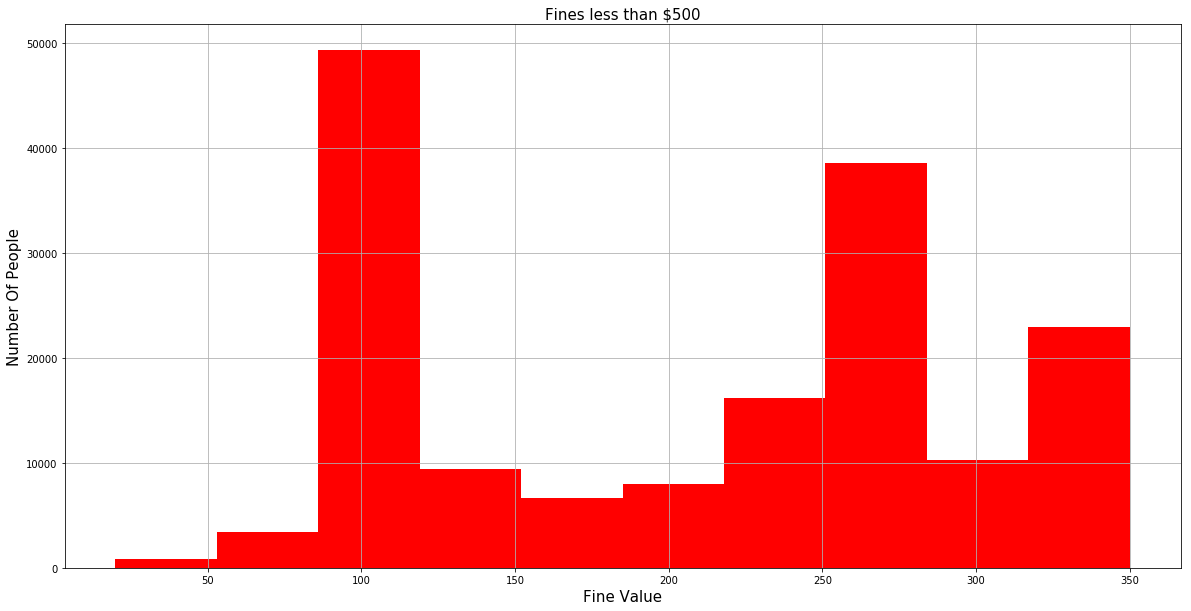

In [61]:
Face_Val[Face_Val <= 350].hist(color = "r")
plt.xlabel("Fine Value", fontsize = 15)
plt.ylabel("Number Of People", fontsize = 15)
plt.title("Fines less than $500", fontsize = 15)
plt.grid(True)

Here we can explain the spike at 250-300 range 

The 400 range spike is contribute by a number of different codes all with a similar Face_value

# Most Common Time For Offences 

Now that we have discovered the most common offence and fine value, lets venture into the most common months that offences occur in and lets look at how crime has inceasedor decreased ove the years 

In [51]:
penalty_data = pd.read_csv(filepath,infer_datetime_format = True, parse_dates = ["OFFENCE_MONTH"], dayfirst =True)

penalty_data.head(2)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2018-2019,2019-02-01,82605,Enter intersection when intersection/road beyo...,ROAD RULES 2014,128,263,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,10783
1,2018-2019,2019-01-01,18056,Fail to provide proper and sufficient food to ...,PREVENTION OF CRUELTY TO ANIMALS ACT 1979,8(1),200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,200


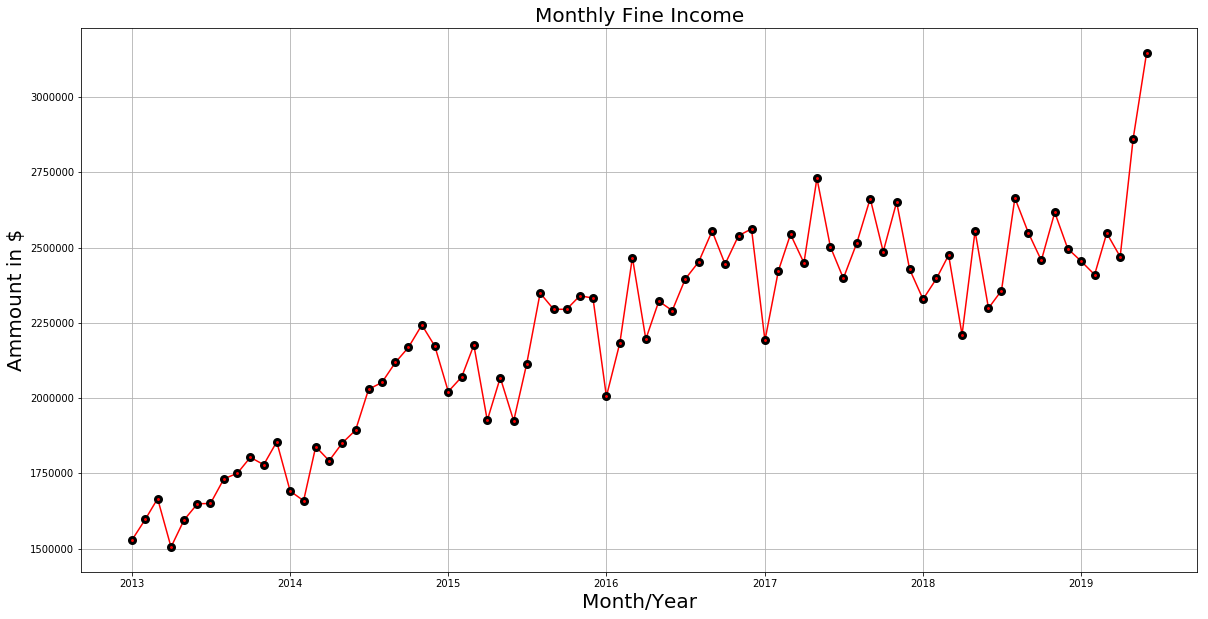

In [62]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.plot(income, marker="o", color = "r", markeredgewidth = "3", markeredgecolor = "k")
plt.title("Monthly Fine Income", fontsize=20)
plt.xlabel("Month/Year", fontsize=20)
plt.ylabel("Ammount in $", fontsize=20)
plt.grid(True)
plt.show()

{2: 26434, 1: 26031, 4: 26474, 6: 27410, 5: 28034, 3: 27555, 8: 24128, 11: 24559, 9: 24008, 10: 23933, 12: 24361, 7: 23349}


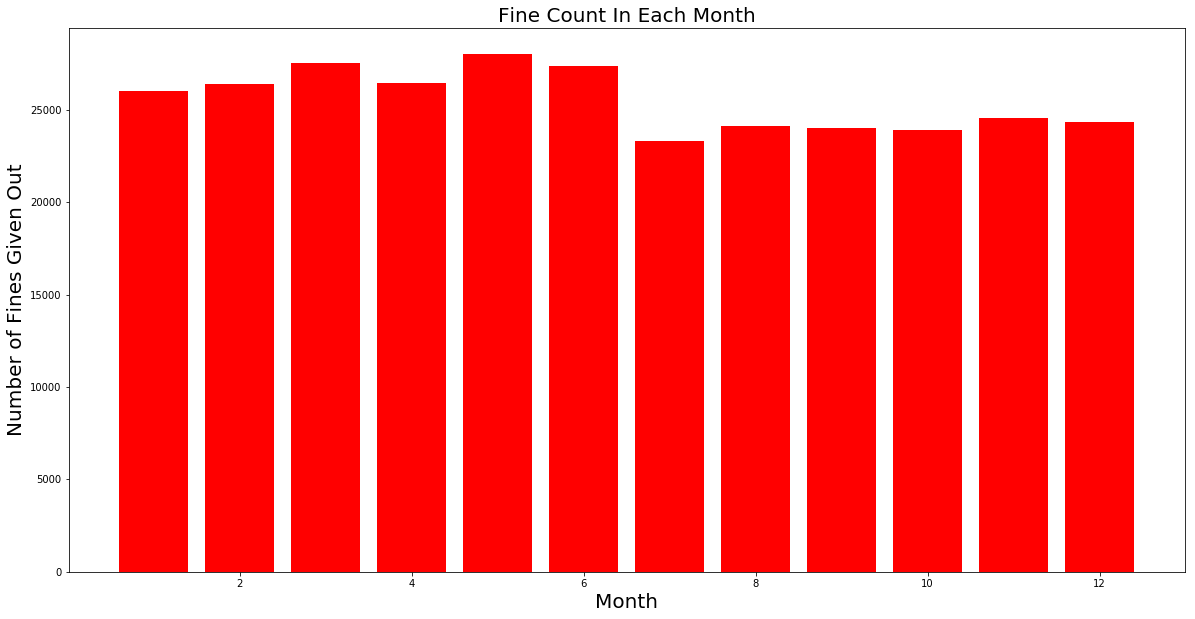

In [53]:
Monthly_Fine_list = []
for k in range(0,len(penalty_data)):
    row_one = penalty_data["OFFENCE_MONTH"][k].month
    Monthly_Fine_list.append(row_one)
counts = {}
for n in Monthly_Fine_list:
    counts[n] = counts.get(n,0)+1
print(counts)
plt.bar(*zip(*counts.items()), color = "r")
plt.title("Fine Count In Each Month", fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Number of Fines Given Out", fontsize=20)
plt.show()

From the graph above we can confirm that the most crime has occured in the month of May but the other months are not far behind.
Meaning that there isnt really a concerning difference in crime number based on months.

{2019: 25574, 2018: 49040, 2017: 47994, 2016: 48501, 2015: 48867, 2014: 47082, 2013: 39218}


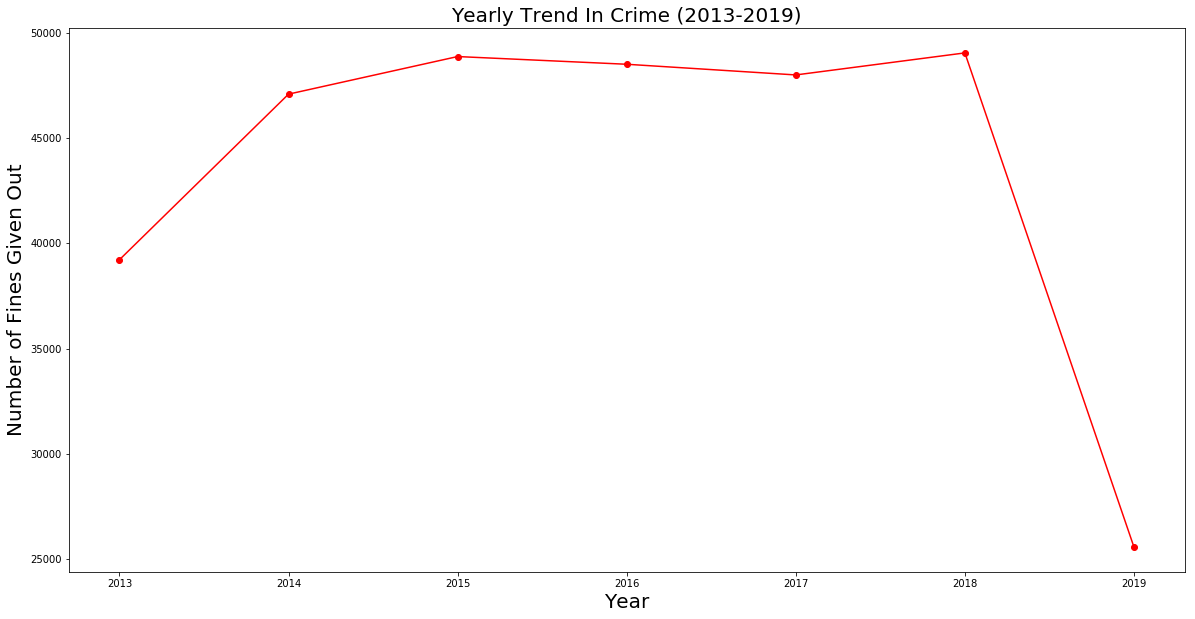

In [54]:
Year_list = []
for k in range(0,len(penalty_data)):
    row_two = penalty_data["OFFENCE_MONTH"][k].year
    Year_list.append(row_two)
counts = {}
for n in Year_list:
    counts[n] = counts.get(n,0)+1
print(counts)
plt.plot(*zip(*counts.items()), marker="o", color = "r")
plt.title("Yearly Trend In Crime (2013-2019)", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Fines Given Out", fontsize=20)
plt.show()

In Conclusion, from the data we now know that most common fine given out comes under the Road Rules legislation, with a face_value of roughly $100 

Weve also noticed that the trend in crime has been relatively stable between the years of 2013 and 2018


# FIN